# 多层感知机

### 真正的深度网络来力，其中最简单的就是多层感知机
#### 多层感知机由多层神经元组成， 每一层与它的上一层相连，从中接收输入； 
#### 同时每一层也与它的下一层相连，影响当前层的神经元

## 4.1. 多层感知机

### 4.1.1. 隐藏层

#### 仿射变换中的线性是一个很强的假设

### 4.1.1.1. 线性模型可能会出错

#### 然而我们可以很容易找出违反单调性的例子
#### 例如，我们想要根据体温预测死亡率
#### 对体温高于37摄氏度的人来说，温度越高风险越大。 然而，对体温低于37摄氏度的人来说，温度越高风险就越低
#### 在这种情况下，我们也可以通过一些巧妙的预处理来解决问题如将体温与37度的距离设为特征

#### 我们的数据可能会有一种考虑到特征间相互作用的表示，在此基础上建立线性模型是合适的
#### 对于深度神经网络，我们使用观测数据来联合学习隐藏层表示和应用于该表示的线性预测器

### 4.1.1.2. 在网络中加入隐藏层

#### 在网络中加入一或多个隐藏层来克服线性模型的限制，使其能处理更普遍的函数关系类型
#### 最简单的方法就是将许多全连接层堆叠在一起
#### 每一层都输出到上面的层，直到生成最后的输出
####  我们可以把前$L-1$层看作表示，把最后一层看作线性预测器
#### 这种架构通常称为多层感知机（multilayer perceptron），MLP

#### <img src="https://zh.fc.ai/_images/mlp.svg" alt="一个单隐藏层的多层感知机，具有5个隐藏单元">

#### 这个多层感知机有4个输入，3个输出，其隐藏层包含5个隐藏单元
#### 输入层不涉及任何计算，因此使用此网络产生输出只需要实现隐藏层和输出层的计算。 
#### 因此，这个多层感知机中的层数为2
#### 因为两个层是全连接的，所以输入会影响隐藏层中的每个神经元

#### 具有全连接层的多层感知机的参数开销可能会高得令人望而却步
#### 可能在参数节约和模型有效性之间进行权衡 (Zhang et al., 2021)

### 4.1.1.3. 从线性到非线性

#### 线性模型的局限性
##### 矩阵表示法：使用矩阵来表示具有多个特征的样本批次。
##### 单隐藏层的MLP：包含隐藏单元，以及隐藏层和输出层的权重和偏置。
##### 问题：如果没有非线性，增加隐藏层不会扩展模型的能力超越仿射函数。

#### 非线性的重要性
##### 仿射函数的限制：仅包含仿射变换的MLP本质上是线性的，限制了其表达能力。
##### 解决方案 - 激活函数：
在每个仿射变换后应用非线性激活函数。
这种方法确保MLP不能被简化为线性模型。
激活函数对每个元素操作，允许独立计算每个激活值。
构建复杂的MLP
##### 堆叠层：可以堆叠更多层（例如，...），以增强模型的表达能力。
##### 独立激活：每个激活值的计算不需要考虑其他隐藏单元的值，适用于大多数激活函数。

### 4.1.1.4. 通用近似定理

#### 设计隐藏节点来执行任意计算
#### 在一对输入上进行基本逻辑操作，多层感知机是通用近似器


### 4.1.2. 激活函数

#### 激活函数（activation function）通过计算加权和并加上偏置来确定神经元是否应该被激活
#### 将输入信号转换为输出的可微运算，大多数激活函数都是非线性的

In [1]:
%matplotlib inline
import torch
from fc import torch as fc

### 4.1.2.1. ReLU函数

#### 最受欢迎的激活函数是修正线性单元（Rectified linear unit，ReLU）
#### 因为它实现简单，同时在各种预测任务中表现良好
#### $$ \operatorname{ReLU}(x) = \max(x, 0).$$

#### 通俗地说，ReLU函数通过将相应的活性值设为0，仅保留正元素并丢弃所有负元素

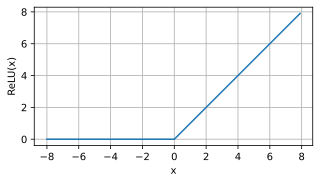

In [2]:
x = torch.arange(-8.0, 8.0, 0.1, requires_grad=True)
y = torch.relu(x)
fc.plot(x.detach(), y.detach(), 'x', 'ReLU(x)', figsize=(5, 2.5))

#### 输入值精确等于0时，ReLU函数不可导。 在此时，我们默认使用左侧的导数
#### “如果微妙的边界条件很重要，我们很可能是在研究数学而非工程”

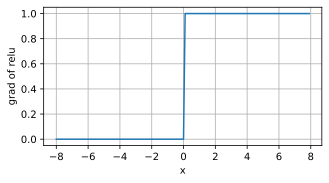

In [3]:
y.backward(torch.ones_like(x), retain_graph=True)
fc.plot(x.detach(), x.grad, 'x', 'grad of relu', figsize=(5, 2.5))

#### 使用ReLU的原因是，它求导表现得特别好：要么让参数消失，要么让参数通过
#### 这使得优化表现得更好，并且ReLU减轻了困扰以往神经网络的梯度消失问题

#### ReLU函数有许多变体，包括参数化ReLU（Parameterized ReLU，pReLU） 函数
#### 该变体为ReLU添加了一个线性项，因此即使参数是负的，某些信息仍然可以通过：
#### $$ \operatorname{pReLU}(x) = \max(0, x) + \alpha \min(0, x). $$

### 4.1.2.2. sigmoid函数

#### 对于一个定义域在$\mathbb{R}$中的输入， sigmoid函数将输入变换为区间(0, 1)上的输出
#### 因此，sigmoid通常称为挤压函数（squashing function）： 
#### 它将范围（-inf, inf）中的任意输入压缩到区间（0, 1）中的某个值：
#### $$ \operatorname{sigmoid}(x) = \frac{1}{1 + \exp(-x)}. $$

#### 早年，科学家们感兴趣的是对“激发”或“不激发”的生物神经元进行建模
#### 阈值单元在其输入低于某个阈值时取值0，当输入超过阈值时取值1。

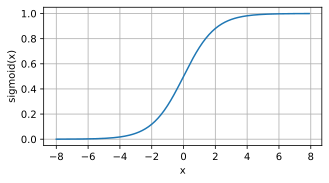

In [4]:
y = torch.sigmoid(x)
fc.plot(x.detach(), y.detach(), 'x', 'sigmoid(x)', figsize=(5, 2.5))

#### sigmoid函数的导数为下面的公式：
#### $$ \frac{d}{dx} \operatorname{sigmoid}(x) = \frac{\exp(-x)}{(1 + \exp(-x))^2} = \operatorname{sigmoid}(x)\left(1-\operatorname{sigmoid}(x)\right).$$

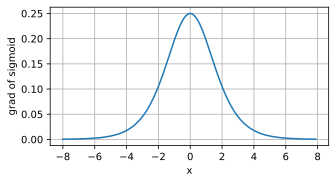

In [5]:
# 清除梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x), retain_graph=True)
fc.plot(x.detach(), x.grad, 'x', 'grad of sigmoid', figsize=(5, 2.5))

### 4.1.2.3. tanh函数

#### 与sigmoid函数类似， tanh(双曲正切)函数也能将其输入压缩转换到区间(-1, 1)上，公式如下：
#### $$ \operatorname{tanh}(x) = \frac{1 - \exp(-2x)}{1 + \exp(-2x)}.$$

#### 注意，当输入在0附近时，tanh函数接近线性变换。 
#### 函数的形状类似于sigmoid函数， 不同的是tanh函数关于坐标系原点中心对称。

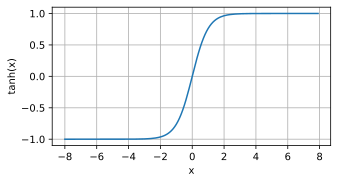

In [6]:
y = torch.tanh(x)
fc.plot(x.detach(), y.detach(), 'x', 'tanh(x)', figsize=(5, 2.5) )

#### tanh函数的导数是：
#### $$ \frac{d}{dx} \operatorname{tanh}(x) = 1 - \operatorname{tanh}^2(x).$$

#### 当输入接近0时，tanh函数的导数接近最大值1

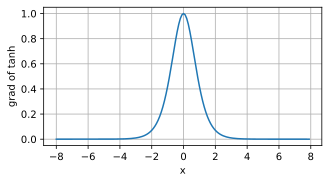

In [7]:
# 清除以前的梯度
x.grad.data.zero_()
y.backward(torch.ones_like(x),retain_graph=True)
fc.plot(x.detach(), x.grad, 'x', 'grad of tanh', figsize=(5, 2.5))

#### 我们了解了如何结合非线性函数来构建具有更强表达能力的多层神经网络架构
#### 现在的🧀相当于掌握了90年代深度学习工作者的工具

### 4.1.3. 小结

#### 多层感知机在输出层和输入层之间增加一个或多个全连接隐藏层，通过激活函数转化隐藏层的输出
#### 常用的激活函数包括ReLU函数、sigmoid函数和tanh函数

### 4.1.4 练习

#### 1. 计算pReLU激活函数的导数。
#### 2. 证明一个仅使用ReLU（或pReLU）的多层感知机构造了一个连续的分段线性函数。
#### 3. 证明tanh(�)+1=2sigmoid(2�)。
#### 4. 假设我们有一个非线性单元，将它一次应用于一个小批量的数据。这会导致什么样的问题？

## 4.2. 多层感知机的从零开始实现

#### 现在让我们尝试自己实现一个多层感知机
#### 继续使用Fashion-MNIST图像分类数据集

In [8]:
from torch import nn

batch_size = 256
train_iter, test_iter = fc.load_data_fashion_mnist(batch_size)

100.0%


Extracting ../data\FashionMNIST\raw\train-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\train-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



100.0%


Extracting ../data\FashionMNIST\raw\t10k-images-idx3-ubyte.gz to ../data\FashionMNIST\raw



100.0%

Extracting ../data\FashionMNIST\raw\t10k-labels-idx1-ubyte.gz to ../data\FashionMNIST\raw



### 4.2.1. 初始化模型参数

#### Fashion-MNIST中的每个图像由784个灰度像素值组成。 所有图像共分为10个类别
#### 忽略像素空间结构，将每个图像视为具有784个输入特征 和10个类的简单分类数据集
#### 我们将实现一个具有单隐藏层的多层感知机， 它包含256个隐藏单元
#### 我们可以将这两个变量（特征和类？）都视为超参数
#### 通常，我们选择2的若干次幂作为层的宽度

#### 我们用几个张量来表示我们的参数。 每一层都要记录一个权重矩阵和一个偏置向量。 
#### 要为损失关于这些参数的梯度分配内存。

In [9]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256

W1 = nn.Parameter(torch.randn(
    num_inputs, num_hiddens, requires_grad=True) * 0.01)
b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
W2 = nn.Parameter(torch.randn(
    num_hiddens, num_outputs, requires_grad=True) * 0.01)
b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

params = [W1, b1, W2, b2]

In [19]:
# test 1
# num_inputs, num_outputs, num_hiddens = 784, 10, 512

# W1 = nn.Parameter(torch.randn(
#     num_inputs, num_hiddens, requires_grad=True) * 0.01)
# b1 = nn.Parameter(torch.zeros(num_hiddens, requires_grad=True))
# W2 = nn.Parameter(torch.randn(
#     num_hiddens, num_outputs, requires_grad=True) * 0.01)
# b2 = nn.Parameter(torch.zeros(num_outputs, requires_grad=True))

# params = [W1, b1, W2, b2]

### 4.2.2. 激活函数

In [11]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

### 4.2.3. 模型

#### 用reshape将每个二维图像转换为一个长度为num_inputs的向量

In [12]:
def net(X):
    X = X.reshape((-1, num_inputs))
    H = relu(X@W1 + b1)  # 这里“@”代表矩阵乘法
    return (H@W2 + b2)

### 4.2.4 损失函数

#### 直接使用高级API中的内置函数来计算softmax和交叉熵损失

In [13]:
loss = nn.CrossEntropyLoss(reduction='none')

### 4.2.5. 训练

### 直接的调fc包的train_ch3函数 将迭代周期数设置为10，并将学习率设置为0.1.

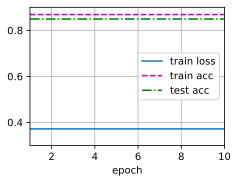

In [20]:
num_epoches = 10
lr = 0.1
updater = torch.optim.SGD(params, lr=lr)
fc.train_ch3(net, train_iter, test_iter, loss, num_epoches, updater)

#### test 一波

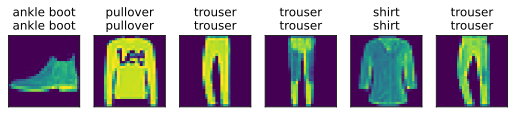

In [15]:
fc.predict_ch3(net, test_iter)

### 4.2.6. 小结

#### 两层确实简单，就是第一层输出激活后进第二层
#### but，层数一上来就会很麻烦

### 4.2.7. 练习

#### 1. 在所有其他参数保持不变的情况下，更改超参数`num_hiddens`的值，并查看此超参数的变化对结果有何影响。确定此超参数的最佳值。
试试
没太大区别， 可能test的accuracy在中间会下滑一点

#### 2. 尝试添加更多的隐藏层，并查看它对结果有何影响
设置成512的Accuracy和loss会很平，几乎没有影响

#### 3. 改变学习速率会如何影响结果？保持模型架构和其他超参数（包括轮数）不变，学习率设置为多少会带来最好的结果？
调的太快可能会越过一些重要的点，

#### 4. 通过对所有超参数（学习率、轮数、隐藏层数、每层的隐藏单元数）进行联合优化，可以得到的最佳结果是什么？


#### 5. 描述为什么涉及多个超参数更具挑战性。
可能变多了很多

#### 6. 如果想要构建多个超参数的搜索方法，请想出一个聪明的策略。

## 4.3 多层感知机的简单实现

In [16]:
import torch
from torch import nn

### 4.3.1. 模型

#### 与softmax回归的简洁实现（ 3.7节）相比， 唯一的区别是我们添加了2个全连接层

In [23]:
num_hiddens = 256

In [26]:
net = nn.Sequential(nn.Flatten(),
                    nn.Linear(784, num_hiddens),
                    nn.LeakyReLU(),
                    nn.Linear(num_hiddens, 10))
        
def init_weights(m):
    if type(m) == nn.Linear:
        nn.init.normal_(m.weight, std=0.01)
    
net.apply(init_weights)

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=256, bias=True)
  (2): LeakyReLU(negative_slope=0.01)
  (3): Linear(in_features=256, out_features=10, bias=True)
)

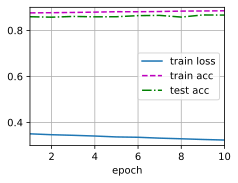

In [30]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = fc.load_data_fashion_mnist(batch_size)
fc.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

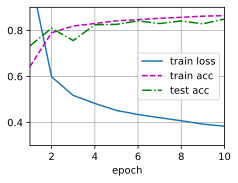

In [18]:
batch_size, lr, num_epochs = 256, 0.1, 10
loss = nn.CrossEntropyLoss(reduction='none')
trainer = torch.optim.SGD(net.parameters(), lr=lr)

train_iter, test_iter = fc.load_data_fashion_mnist(batch_size)
fc.train_ch3(net, train_iter, test_iter, loss, num_epochs, trainer)

### 4.3.2. 小结

#### 可以更简洁的实现，通过api
#### 对于相同的分类问题，多层感知机的实现与softmax回归的实现相同，只是mlp有激活函数

### 4.3.3. 练习

#### 1. 尝试添加不同数量的隐藏层（也可以修改学习率），怎么样设置效果最好？


尝试下来，隐藏层越少，损失会越大，准确率会越低。

#### 2. 尝试不同的激活函数，哪个效果最好？


用了LeakyReLU，Accuracy会平稳且高一点

#### 3. 尝试不同的方案来初始化权重，什么方法效果最好？

lr调到0.01就超出范围了
0.1我觉得挺好

## 4.4. 模型选择、欠拟合和过拟合

我们需要发现模式（Pattern），我们如何才能确认模型是真正发现了一种泛化的模型。
举个例子：沐神当时考GRE的时候刷题，发现只要背红宝书就行了。结果后来考试的时候考不好了，只能上MIT、CMU这种学校。
另外本章有一些知识点：
- 将模型在训练数据上拟合的比在潜在分布中更接近的现象称为过拟合（overfitting）
- 用于对抗过拟合的技术称为正则化（regularization）。

### 4.4.1.

进一步讨论这个现象，我们需要了解训练误差和泛化误差。 
- 训练误差（training error）是指， 模型在训练数据集上计算得到的误差。 
- 泛化误差（generalization error）是指， 模型应用在同样从原始样本的分布中抽取的无限多数据样本时，模型误差的期望。

#### 4.4.1.1. 统计学习理论

由于泛化是机器学习中的基本问题， 许多数学家和理论家毕生致力于研究描述这一现象的形式理论。 在同名定理（eponymous theorem）中， 格里文科和坎特利推导出了训练误差收敛到泛化误差的速率。 在一系列开创性的论文中， Vapnik和Chervonenkis 将这一理论扩展到更一般种类的函数。 这项工作为统计学习理论奠定了基础。

在我们目前已探讨、并将在之后继续探讨的监督学习情景中， 我们假设训练数据和测试数据都是从相同的分布中独立提取的。 这通常被称为独立同分布假设（i.i.d. assumption）， 这意味着对数据进行采样的过程没有进行“记忆”。 换句话说，抽取的第2个样本和第3个样本的相关性， 并不比抽取的第2个样本和第200万个样本的相关性更强。

假设是存在漏洞的，即很容易找出假设失效的情况。有些违背独立同分布假设的行为肯定会带来麻烦。 

比如，我们试图只用来自大学生的人脸数据来训练一个人脸识别系统， 然后想要用它来监测疗养院中的老人。

#### 4.4.1.2. 模型复杂性

当我们有简单的模型和大量的数据时，我们期望泛化误差与训练误差相近。 当我们有更复杂的模型和更少的样本时，我们预计训练误差会下降，但泛化误差会增大。 模型复杂性由什么构成是一个复杂的问题。 

一个模型是否能很好地泛化取决于很多因素。 例如，具有更多参数的模型可能被认为更复杂， 参数有更大取值范围的模型可能更为复杂。 通常对于神经网络，我们认为需要更多训练迭代的模型比较复杂， 而需要早停（early stopping）的模型（即较少训练迭代周期）就不那么复杂。

很难比较从本质上属于不同大类模型的复杂性

统计学家认为，能够轻松解释任意事实的模型是复杂的， 而表达能力有限但仍能很好地解释数据的模型可能更有现实用途。

在哲学上，这与波普尔的科学理论的可证伪性标准密切相关： 如果一个理论能拟合数据，且有具体的测试可以用来证明它是错误的，那么它就是好的。

本章将重点介绍几个倾向于影响模型泛化的因素。

1. 可调整参数的数量。当可调整参数的数量（有时称为自由度）很大时，模型往往更容易过拟合。

2. 参数采用的值。当权重的取值范围较大时，模型可能更容易过拟合。

3. 训练样本的数量。即使模型很简单，也很容易过拟合只包含一两个样本的数据集。而过拟合一个有数百万个样本的数据集则需要一个极其灵活的模型。

### 4.4.2. 模型选择

在机器学习中，我们通常在评估几个候选模型后选择最终的模型。 这个过程叫做模型选择。

### 4.4.2.1. 验证集

原则上，在我们确定所有的超参数之前，我们不希望用到测试集。 

虽然理想情况下我们只会使用测试数据一次， 以评估最好的模型或比较一些模型效果，但现实是测试数据很少在使用一次后被丢弃。 

解决此问题的常见做法是将我们的数据分成三份， 除了训练和测试数据集之外，还增加一个验证数据集（validation dataset）， 也叫验证集（validation set）。 但现实是验证数据和测试数据之间的边界模糊得令人担忧。 除非另有明确说明，否则在这本书的实验中， 我们实际上是在使用应该被正确地称为训练数据和验证数据的数据集， 并没有真正的测试数据集。

#### 4.4.2.2. K折交叉验证

当训练数据稀缺时，我们甚至可能无法提供足够的数据来构成一个合适的验证集。 这个问题的一个流行的解决方案是采用K折交叉验证。 这里，原始训练数据被分成K个不重叠的子集。 然后执行K次模型训练和验证，每次在K-1个子集上进行训练， 并在剩余的一个子集（在该轮中没有用于训练的子集）上进行验证。 最后，通过对K次实验的结果取平均来估计训练和验证误差。

### 4.4.3. 欠拟合还是过拟合？

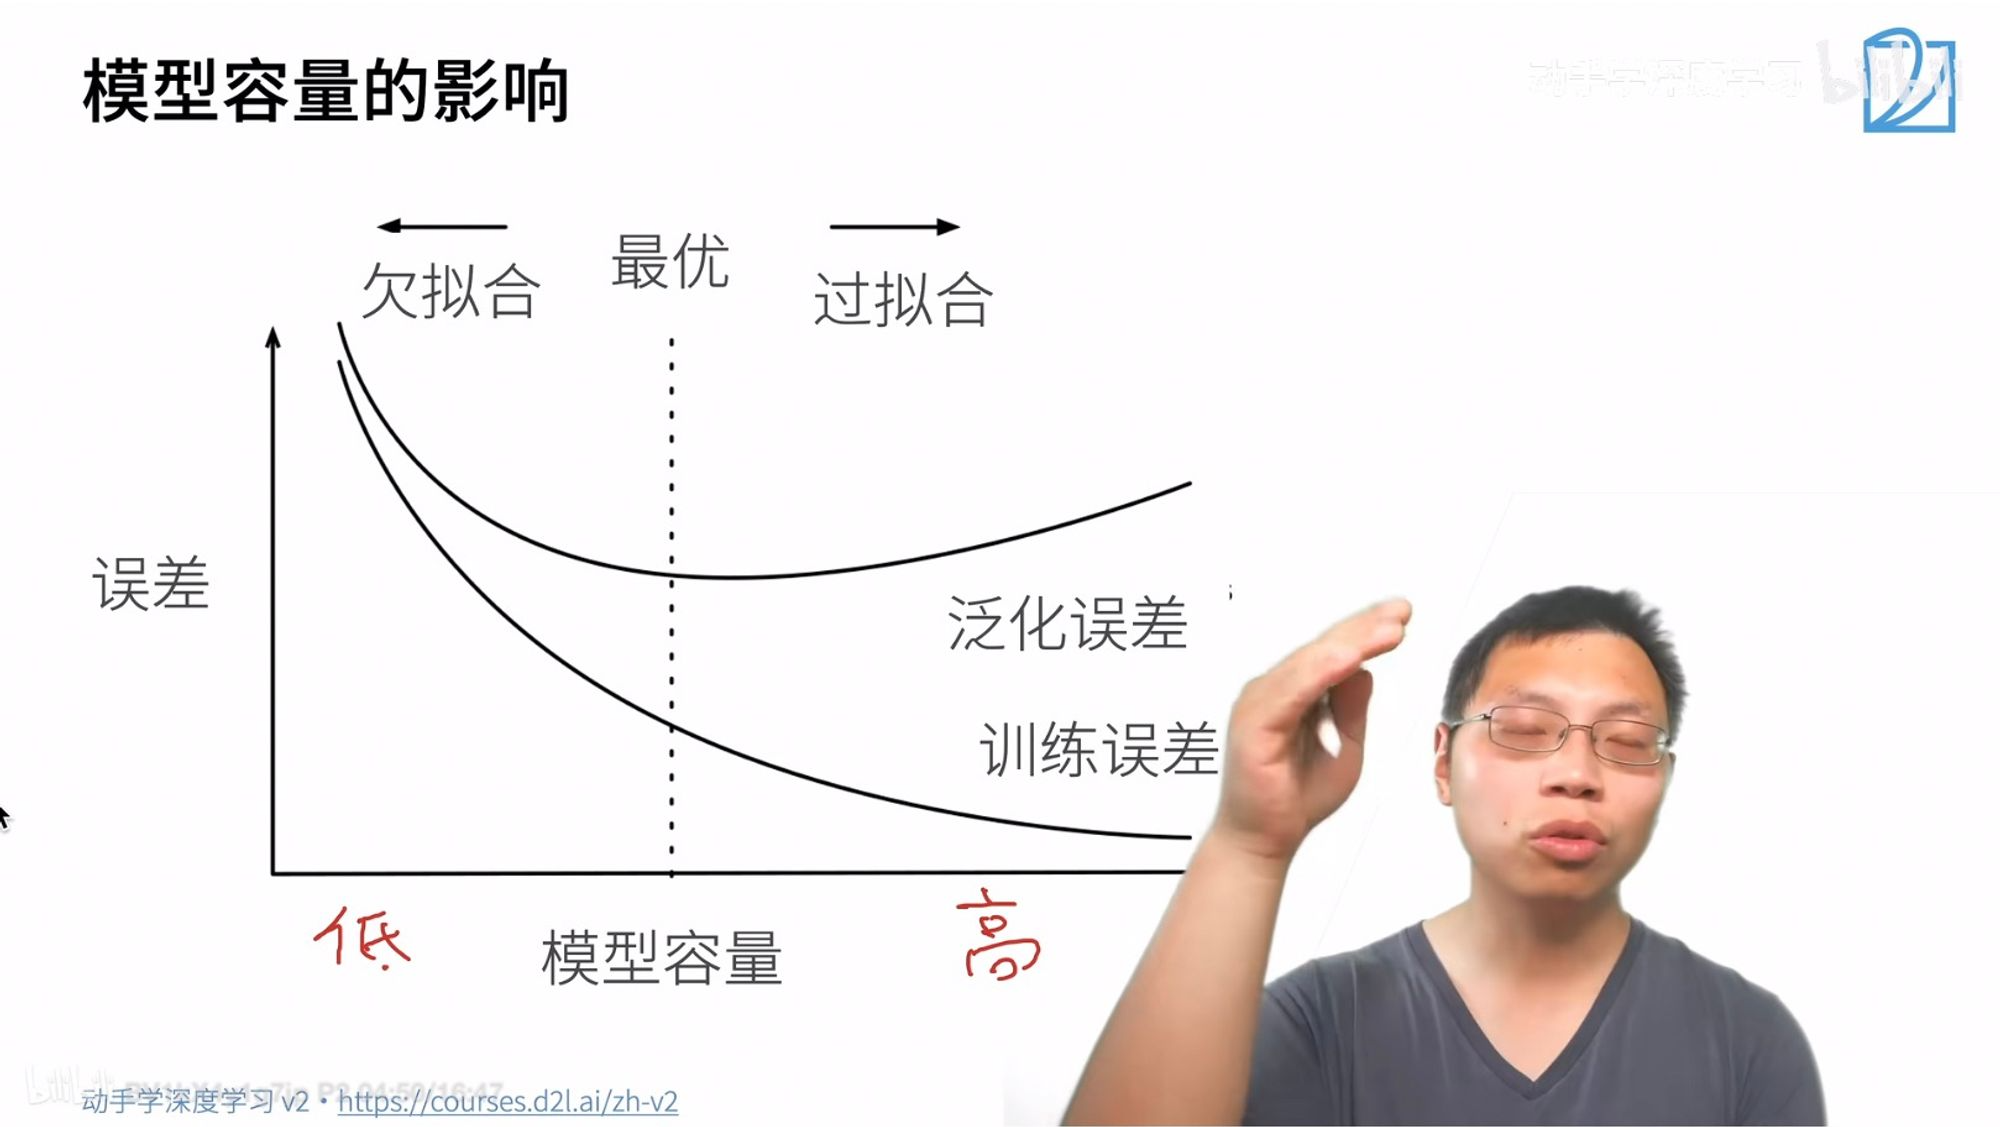

训练误差和验证误差都很严重， 但它们之间仅有一点差距。 如果模型不能降低训练误差，这可能意味着模型过于简单（即表达能力不足）， 无法捕获试图学习的模式。 此外，由于我们的训练和验证误差之间的泛化误差很小， 我们有理由相信可以用一个更复杂的模型降低训练误差。 这种现象被称为欠拟合（underfitting）。

另一方面，当我们的**训练误差明显低于验证误差**时要小心， 这表明严重的过拟合（overfitting）。 注意，过拟合并不总是一件坏事。 特别是在深度学习领域，众所周知， 最好的预测模型在训练数据上的表现往往比在保留（验证）数据上好得多。 最终，我们通常更关心验证误差，而不是训练误差和验证误差之间的差距。

#### 4.4.3.1. 模型复杂性

$\hat{y}= \sum_{i=0}^d x^i w_i$

给定x和对应y训练数据，试图找到以上多项式来预测y。

这只是一个线性回归问题，特征是x的幂给出，模型权重是$w_i$，偏置是$w_0$

事实上，当数据样本包含了x的不同值时， 函数阶数等于数据样本数量的多项式函数可以完美拟合训练集。 

#### 4.4.3.2. 数据集大小

另一个重要因素是数据集的大小。 训练数据集中的样本越少，我们就越有可能（且更严重地）过拟合。 随着训练数据量的增加，泛化误差通常会减小。 

对于固定的任务和数据分布，模型复杂性和数据集大小之间通常存在关系。 给出更多的数据，我们可能会尝试拟合一个更复杂的模型。如果没有足够的数据，简单的模型可能更有用。

### 4.4.4. 多项式回归

In [31]:
import math
import numpy as np
import torch
from torch import nn
from fc import torch as fc

#### 4.4.4.1. 生成数据集

给定x，我们将使用以下三阶多项式来生成训练和测试数据的标签：
$$y = 5 + 1.2x - 3.4\frac{x^2}{2!} + 5.6 \frac{x^3}{3!} + \epsilon \text{ where }
\epsilon \sim \mathcal{N}(0, 0.1^2).$$

噪声项$\epsilon$服从均值为0且标准差为0.1的正态分布。

为避免非常大的梯度值或损失值我们将特征从$x^i$调整为$\frac{x^i}{i!}$,这样可以避免很大的$i$带来的特别大的指数值。

我们将为训练集和测试集各生成100个样本。


In [32]:
max_degree = 20  # 多项式的最大阶数
n_train, n_test = 100, 100  # 训练和测试数据集大小
true_w = np.zeros(max_degree)  # 分配大量的空间
true_w[0:4] = np.array([5, 1.2, -3.4, 5.6])

features = np.random.normal(size=(n_train + n_test, 1)) # 生成数据
np.random.shuffle(features) # 打乱数据点
poly_features = np.power(features, np.arange(max_degree).reshape(1, -1)) # 计算特征的多项式项
for i in range(max_degree): # 标准化多项式特征
    poly_features[:, i] /= math.gamma(i + 1)  # gamma(n)=(n-1)!
# labels的维度:(n_train+n_test,)
labels = np.dot(poly_features, true_w) # 计算标签
labels += np.random.normal(scale=0.1, size=labels.shape) # 添加噪声

同样，存储在poly_features中的单项式由gamma函数重新缩放， 其中$\Gamma(n)=(n-1)!$。 从生成的数据集中查看一下前2个样本， 第一个值是与偏置相对应的常量特征。

In [33]:
# NumPy ndarray转换为tensor
true_w, features, poly_features, labels = [torch.tensor(x, dtype=
    torch.float32) for x in [true_w, features, poly_features, labels]]

features[:2], poly_features[:2, :], labels[:2]

(tensor([[ 0.1385],
         [-0.9372]]),
 tensor([[ 1.0000e+00,  1.3847e-01,  9.5866e-03,  4.4248e-04,  1.5317e-05,
           4.2419e-07,  9.7893e-09,  1.9364e-10,  3.3517e-12,  5.1566e-14,
           7.1402e-16,  8.9881e-18,  1.0371e-19,  1.1047e-21,  1.0926e-23,
           1.0086e-25,  8.7285e-28,  7.1095e-30,  5.4691e-32,  3.9857e-34],
         [ 1.0000e+00, -9.3721e-01,  4.3918e-01, -1.3720e-01,  3.2147e-02,
          -6.0256e-03,  9.4121e-04, -1.2602e-04,  1.4763e-05, -1.5373e-06,
           1.4408e-07, -1.2276e-08,  9.5874e-10, -6.9118e-11,  4.6270e-12,
          -2.8910e-13,  1.6934e-14, -9.3358e-16,  4.8609e-17, -2.3977e-18]]),
 tensor([5.0941, 1.5642]))

#### 4.4.4.2. 对模型进行训练和测试

In [34]:
def evaluate_loss(net, data_iter, loss):  #@save
    """评估给定数据集上模型的损失"""
    metric = fc.Accumulator(2)  # 损失的总和,样本数量
    for X, y in data_iter:
        out = net(X)
        y = y.reshape(out.shape)
        l = loss(out, y)
        metric.add(l.sum(), l.numel())
    return metric[0] / metric[1]

In [37]:
def train(train_features, test_features, train_labels, test_labels,
          num_epochs=400):
    loss = nn.MSELoss(reduction='none')
    input_shape = train_features.shape[-1]
    # 不设置偏置，因为我们已经在多项式中实现了它
    net = nn.Sequential(nn.Linear(input_shape, 1, bias=False))
    batch_size = min(10, train_labels.shape[0])
    train_iter = fc.load_array((train_features, train_labels.reshape(-1,1)),
                                batch_size)
    test_iter = fc.load_array((test_features, test_labels.reshape(-1,1)),
                               batch_size, is_train=False)
    trainer = torch.optim.SGD(net.parameters(), lr=0.01)
    animator = fc.Animator(xlabel='epoch', ylabel='loss', yscale='log',
                            xlim=[1, num_epochs], ylim=[1e-3, 1e2],
                            legend=['train', 'test'])
    for epoch in range(num_epochs):
        fc.train_epoch_ch3(net, train_iter, loss, trainer)
        if epoch == 0 or (epoch + 1) % 20 == 0:
            animator.add(epoch + 1, (evaluate_loss(net, train_iter, loss),
                                     evaluate_loss(net, test_iter, loss)))
    print('weight:', net[0].weight.data.numpy())

#### 4.4.4.3. 三阶多项式函数拟合(正常)

我们将首先使用三阶多项式函数，它与数据生成函数的阶数相同。 结果表明，该模型能有效降低训练损失和测试损失。 学习到的模型参数也接近真实值$w = [5, 1.2, -3.4, 5.6]$

weight: [[ 5.0066166  1.1821498 -3.4221265  5.6232224]]


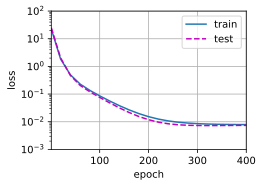

In [38]:
# 从多项式特征中选择前4个维度，即1,x,x^2/2!,x^3/3!
train(poly_features[:n_train, :4], poly_features[n_train:, :4],
      labels[:n_train], labels[n_train:])

#### 4.4.4.4. 线性函数拟合(欠拟合)

让我们再看看线性函数拟合，减少该模型的训练损失相对困难。 在最后一个迭代周期完成后，训练损失仍然很高。 当用来拟合非线性模式（如这里的三阶多项式函数）时，线性模型容易欠拟合。

模型与数据不匹配！ 用线性多项式拟合三次多项式（的数据），所以误差很大

weight: [[3.2177286 3.4891548]]


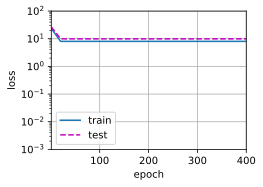

In [39]:
# 从多项式特征中选择前2个维度，即1和x
train(poly_features[:n_train, :2], poly_features[n_train:, :2],
      labels[:n_train], labels[n_train:])

#### 4.4.4.5. 高阶多项式函数拟合(过拟合)

现在，让我们尝试使用一个阶数过高的多项式来训练模型。 在这种情况下，没有足够的数据用于学到高阶系数应该具有接近于零的值。 因此，这个过于复杂的模型会轻易受到训练数据中噪声的影响。 虽然训练损失可以有效地降低，但测试损失仍然很高。 结果表明，**复杂模型对数据造成了过拟合**。

weight: [[ 4.97066879e+00  1.23883379e+00 -3.27398062e+00  5.26095676e+00
  -3.37169796e-01  1.06184375e+00 -2.62262914e-02 -4.26151566e-02
   1.86431304e-01 -5.78673072e-02 -2.32275240e-02 -1.73784509e-01
   1.49106368e-01 -6.18634606e-03 -1.10964455e-01 -2.17547570e-03
  -8.57282430e-02 -1.89280629e-01 -2.02708274e-01  1.05965137e-03]]


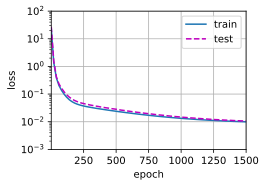

In [40]:
# 从多项式特征中选取所有维度
train(poly_features[:n_train, :], poly_features[n_train:, :],
      labels[:n_train], labels[n_train:], num_epochs=1500)

过的不是很拟合啊。。

在接下来的章节中，我们将继续讨论过拟合问题和处理这些问题的方法，例如权重衰减和dropout

### 4.4.5. 小结

- 欠拟合是指模型无法继续减少训练误差。过拟合是指训练误差远小于验证误差。

- 由于不能基于训练误差来估计泛化误差，因此简单地最小化训练误差并不一定意味着泛化误差的减小。机器学习模型需要注意防止过拟合，即防止泛化误差过大。

- 验证集可以用于模型选择，但不能过于随意地使用它。

- 我们应该选择一个复杂度适当的模型，避免使用数量不足的训练样本。

### 4.4.6. 练习

1. 这个多项式回归问题可以准确地解出吗？提示：使用线性代数。

2. 考虑多项式的模型选择。

    1. 绘制训练损失与模型复杂度（多项式的阶数）的关系图。观察到了什么？需要多少阶的多项式才能将训练损失减少到0?

    2. 在这种情况下绘制测试的损失图。

    3. 生成同样的图，作为数据量的函数。

3. 如果不对多项式特征$x^i$进行标准化$(1/i!)$，会发生什么事情？能用其他方法解决这个问题吗？

4. 泛化误差可能为零吗？

#### 4.4.6.1 回答

1.  暂时不知道
2.  
    1. 3阶以上阶数越高越容易过拟合，3阶以下阶数越低越容易欠拟合，3阶。
    2. 和训练损失相差不大
    3. ？
3. 当阶数比较大时会出现构造的数据值过大的问题，可以用 
4. 不能，因为有噪音存在。

## 4.5. 权重衰减

### 正则化技术简介
在前一节中，我们描述了过拟合的问题，本节将介绍一些正则化模型的技术。虽然可以通过收集更多的训练数据来缓解过拟合，但这可能成本高、耗时长或难以实现。因此，我们重点探讨正则化技术。

### 多项式回归中的特征限制
在多项式回归的例子中（4.4节），我们通过调整拟合多项式的阶数来限制模型的容量。限制特征的数量是一种常用技术，但简单地丢弃特征可能过于粗糙。我们需要一个更细粒度的工具来调整函数的复杂性，使其达到平衡。

### 范数与权重衰减
在2.3.10节中，我们描述了L2范数和L1范数，它们是更一般的Lp范数的特殊情况。权重衰减（weight decay）是最广泛使用的正则化技术之一，也称为L2正则化。它通过函数与零的距离来衡量函数的复杂度，将权重向量的范数作为惩罚项加到损失函数中。


### 正则化的实现
对于线性函数 $ f(x) = w^\top x $，我们可以通过权重向量的范数（例如 $ \|w\|_2 $）来度量其复杂性。我们的损失函数调整为最小化预测损失和惩罚项之和：
$$ L(w, b) = \frac{1}{n} \sum_{i=1}^n \frac{1}{2} \left( w^\top x^{(i)} + b - y^{(i)} \right)^2 + \frac{\lambda}{2} \|w\|_2^2 $$

### L2范数的优势
使用L2范数是为了便于计算，通过平方L2范数，去掉平方根，留下权重向量每个分量的平方和。这样，惩罚的导数容易计算。L2正则化对权重向量的大分量施加巨大的惩罚，使学习算法偏向于均匀分布权重的模型。

### 权重衰减与小批量随机梯度下降
L2正则化回归的小批量随机梯度下降更新公式如下：
$$ w \leftarrow (1 - \eta \lambda) w - \frac{\eta}{|B|} \sum_{i \in B} x^{(i)} \left( w^\top x^{(i)} + b - y^{(i)} \right) $$

### 实践中的应用
是否对偏置项进行惩罚在不同实践中有所不同，通常网络输出层的偏置项不会被正则化。

### 4.5.1. 高维线性回归

In [41]:
%matplotlib inline
import torch
from torch import nn
from fc import torch as fc

首先，我们像以前一样生成一些数据，生成公式如下：
$$y = 0.05 + \sum_{i = 1}^d 0.01 x_i + \epsilon \text{ where } \epsilon \sim \mathcal{N}(0, 0.01^2).$$

为了使过拟合的效果更加明显，我们可以将问题的维数增加到$d = 200$， 并使用一个只包含20个样本的小训练集。

In [42]:
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = fc.synthetic_data(true_w, true_b, n_train)
train_iter = fc.load_array(train_data, batch_size)
test_data = fc.synthetic_data(true_w, true_b, n_test)
test_iter = fc.load_array(test_data, batch_size, is_train=False)

### 4.5.2. 从零开始实现

下面我们将从头开始实现权重衰减，只需将$L_2$的平方惩罚添加到原始目标函数中。

#### 4.5.2.1. 初始化模型参数

首先，我们将定义一个函数来随机初始化模型参数。

In [43]:
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True) # 正态分布初始化
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

#### 4.5.2.2. 定义$L_2$范数惩罚

In [51]:
def l1_penalty(w):
    return torch.sum(torch.abs(w))

In [44]:
def l2_penalty(w):
    return torch.sum(w.pow(2)) / 2

#### 4.5.2.3. 定义训练代码实现

下面的代码将模型拟合训练数据集，并在测试数据集上进行评估。 从 3节以来，线性网络和平方损失没有变化， 所以我们通过fc.linreg和fc.squared_loss导入它们。 唯一的变化是损失现在包括了惩罚项。

In [45]:
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: fc.linreg(X, w, b), fc.squared_loss
    num_epochs, lr = 100, 0.003
    animator = fc.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            fc.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (fc.evaluate_loss(net, train_iter, loss),
                                     fc.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

In [55]:
def train_l1(lambd):
    w, b = init_params()
    net, loss = lambda X: fc.linreg(X, w, b), fc.squared_loss
    num_epochs, lr = 100, 0.003
    animator = fc.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2范数惩罚项，
            # 广播机制使l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l1_penalty(w)
            l.sum().backward()
            fc.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (fc.evaluate_loss(net, train_iter, loss),
                                     fc.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

#### 4.5.2.4. 忽略正则化直接训练

w的L2范数是： 13.020248413085938


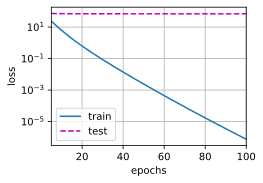

In [54]:
train(lambd=0)

w的L2范数是： 14.003144264221191


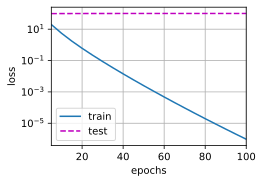

In [56]:
train_l1(lambd=0)

#### 4.5.2.5. 使用权重衰减

w的L2范数是： 0.3878483176231384


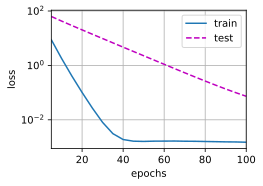

In [47]:
train(lambd=3)

w的L2范数是： 0.07266507297754288


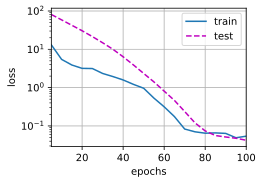

In [57]:
train_l1(lambd=3)

### 4.5.3. 简洁实现

深度学习框架为了便于我们使用权重衰减， 将权重衰减集成到优化算法中，以便与任何损失函数结合使用。

这种集成还有计算上的好处， 允许在不增加任何额外的计算开销的情况下向算法中添加权重衰减。

在下面的代码中，我们在实例化优化器时直接通过weight_decay指定weight decay超参数。 默认情况下，PyTorch同时衰减权重和偏移。 这里我们只为权重设置了weight_decay，所以偏置参数b不会衰减。

In [48]:
def train_concise(wd):
    net = nn.Sequential(nn.Linear(num_inputs, 1))
    for param in net.parameters():
        param.data.normal_()
    loss = nn.MSELoss(reduction='none')
    num_epochs, lr = 100, 0.003
    # 偏置参数没有衰减
    trainer = torch.optim.SGD([
        {"params":net[0].weight,'weight_decay': wd},
        {"params":net[0].bias}], lr=lr)
    animator = fc.Animator(xlabel='epochs', ylabel='loss', yscale='log',
                            xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            trainer.zero_grad()
            l = loss(net(X), y)
            l.mean().backward()
            trainer.step()
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1,
                         (fc.evaluate_loss(net, train_iter, loss),
                          fc.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数：', net[0].weight.norm().item())

w的L2范数： 13.88133430480957


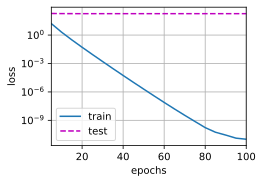

In [49]:
train_concise(0)

w的L2范数： 0.4105062484741211


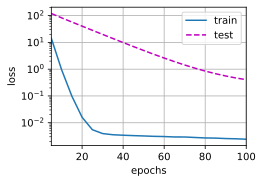

In [50]:
train_concise(3)

### 4.5.4. 小结

- 正则化是处理过拟合的常用方法：在训练集的损失函数中加入惩罚项，以降低学习到的模型的复杂度。

- 保持模型简单的一个特别的选择是使用$L_2$惩罚的权重衰减。这会导致学习算法更新步骤中的权重衰减。

- 权重衰减功能在深度学习框架的优化器中提供。

- 在同一训练代码实现中，不同的参数集可以有不同的更新行为。

### 4.5.5. 练习

1. 在本节的估计问题中使用$\lambda$的值进行实验。绘制训练和测试精度关于$\lambda$的函数。观察到了什么？
一定范围内，lambda越大过拟合越小

2. 使用验证集来找到最佳值$\lambda$。它真的是最优值吗？这有关系吗？
不是，有噪音

3. 如果我们使用$\sum_i |w_i|$作为我们选择的惩罚（正则化），那么更新方程会是什么样子？
    1. $$ L(w, b) = \frac{1}{n} \sum_{i=1}^n \frac{1}{2} \left( w^\top x^{(i)} + b - y^{(i)} \right)^2 + \frac{\lambda}{2} \|w\|_1$$
    其中， $ \|w\|_1 $ 表示权重向量 $ w $ 的 L1 范数，即所有权重绝对值之和：
    
    $ \|w\|_1 = \sum_{j=1}^d |w_j| $

    2. 为了最小化损失函数，我们使用梯度下降法。梯度下降法通过以下方式更新权重 $ w $：
    $$ w \leftarrow w - \eta \frac{\partial L_{\text{reg}}(w, b)}{\partial w} $$
    其中， $ \eta $ 是学习率。我们需要计算损失函数关于 $ w $ 的梯度。

    3. 计算梯度
    损失函数 $ L_{\text{reg}}(w, b) $ 关于 $ w $ 的梯度可以分为两部分：预测损失部分和正则化部分。

    4. 预测损失的梯度
    $$ \frac{\partial}{\partial w} \left( \frac{1}{n} \sum_{i=1}^n \frac{1}{2} \left( w^\top x^{(i)} + b - y^{(i)} \right)^2 \right) = \frac{1}{n} \sum_{i=1}^n \left( w^\top x^{(i)} + b - y^{(i)} \right) x^{(i)} $$

    5. 正则化部分的梯度
    L1 正则化的梯度与 L2 正则化不同。L1 范数的梯度不是一个简单的线性函数，因为它包含绝对值运算。具体来说，L1 正则化的梯度是一个分段函数：
    $$ \frac{\partial \|w\|_1}{\partial w_j} = \begin{cases} 
    1 & \text{if } w_j > 0 \\
    -1 & \text{if } w_j < 0 \\
    0 & \text{if } w_j = 0 
    \end{cases} $$
    为处理 $ w_j = 0 $ 的情况，通常在实际实现中加入一个微小的数值稳定项或使用次梯度法。
    因此，完整的梯度为：
    $$ \frac{\partial L_{\text{reg}}(w, b)}{\partial w} = \frac{1}{n} \sum_{i=1}^n \left( w^\top x^{(i)} + b - y^{(i)} \right) x^{(i)} + \lambda \cdot \text{sign}(w) $$
    其中， $ \text{sign}(w) $ 是一个向量，其每个元素是对应权重的符号函数。

   6. 更新公式
    将梯度代入梯度下降更新公式中：
    $$ w \leftarrow w - \eta \left( \frac{1}{n} \sum_{i=1}^n \left( w^\top x^{(i)} + b - y^{(i)} \right) x^{(i)} + \lambda \cdot \text{sign}(w) \right) $$

    $$ w \leftarrow w - \eta \left( \frac{1}{n} \sum_{i=1}^n \left( w^\top x^{(i)} + b - y^{(i)} \right) x^{(i)} \right) - \eta \lambda \cdot \text{sign}(w) $$


4. 我们知道$\|\mathbf{w}\|^2 = \mathbf{w}^\top \mathbf{w}$。能找到类似的矩阵方程吗（见 2.3.10节 中的Frobenius范数）？
能

1. 回顾训练误差和泛化误差之间的关系。除了权重衰减、增加训练数据、使用适当复杂度的模型之外，还能想出其他什么方法来处理过拟合？
调参，调整损失函数，数据增强

1. 在贝叶斯统计中，我们使用先验和似然的乘积，通过公式$P(w \mid x) \propto P(x \mid w) P(w)$得到后验。如何得到带正则化的$P(w)$？
不知道